In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from scipy.integrate import quad, fixed_quad, simps

In [27]:
df = pd.read_csv('data/us_topemployee.csv')
df

,Unnamed: 0,year,id,employee,logemployee,fgrow_log
0,0,2019,1,71000.0,11.170435,0.053474
1,1,2019,2,132000.0,11.790557,0.037179
2,2,2019,3,389000.0,12.871335,0.006406
3,3,2019,4,647500.0,13.380874,0.208990
4,4,2019,5,300000.0,12.611538,0.080043
...,...,...,...,...,...,...
4186,4186,2015,889,7959.0,8.982059,-1.342897
4187,4187,2015,890,4400.0,8.389360,1.572397
4188,4188,2015,891,1900.0,7.549609,1.688735
4189,4189,2015,892,6758.0,8.818482,-1.122270


In [28]:
df1 = df[['logemployee', 'fgrow_log']] 
df1['fgrow_log'].max()

3.3366876889378703

In [29]:
df = df1[df1['fgrow_log'] != 0.0]


In [30]:
x = np.asarray(df['logemployee'])

In [31]:
y = np.asarray(df['fgrow_log']) 

## Scatter Plot

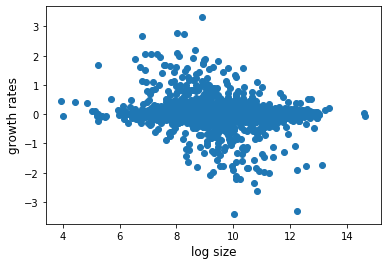

In [32]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('log size', fontsize=12)
ax.set_ylabel('growth rates', fontsize = 12)
plt.show()

## Laplace distribution

In [33]:
def laplace(x, μ, λ):
    return 0.5 * λ * np.exp(- λ * np.abs(x - μ))

#### MLEs for the Laplace Distribution

In [34]:
obs = y[x > 10]
len(obs)

1348

In [35]:
obs.std()

0.3293037884079421

In [36]:
obs.mean()

-0.029258433773540638

In [37]:
μ_hat = np.median(obs)

In [38]:
b_hat = np.mean(np.abs(obs - μ_hat))

## Growth Histograms

In [39]:
μ_hat, b_hat

(0.014634494584473856, 0.13086129721144296)

In [40]:
λ_hat = 1/b_hat

In [41]:
λ_hat

7.641678795100287

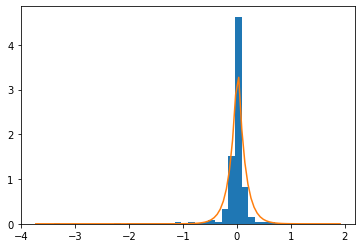

In [42]:
fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)

s = obs.std()
xgrid = np.linspace(obs.min() - s, obs.max() + s, 100)
ax.plot(xgrid, laplace(xgrid, μ=μ_hat, λ=λ_hat))

plt.show()

In [43]:
def compute_alpha(alpha_grid, μ=μ_hat, λ=λ_hat):
    vals = np.zeros_like(alpha_grid)
    for i, α in enumerate(alpha_grid):
        g = lambda x: np.exp(α * x) * laplace(x, μ, λ)
        x_grid = np.linspace(-2, μ, 200)
        y_grid = g(x_grid)
        vals[i] += simps(y_grid, x_grid)
        x_grid = np.linspace(μ, 2, 200)
        y_grid = g(x_grid)
        vals[i] += simps(y_grid, x_grid)

    return vals
        

In [44]:
alpha_grid = np.linspace(0.0, 10.0, 50)

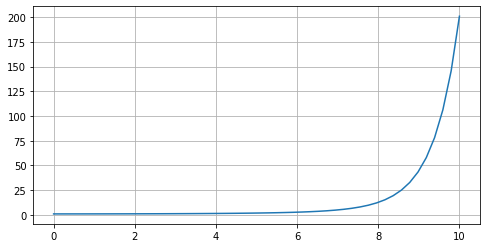

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
vals = compute_alpha(alpha_grid)
ax.grid()
#ax.set_ylim((0, 2))
#ax.set_yticks((1,))
ax.plot(alpha_grid, vals)
plt.show()

In [46]:
def m(α):
    "Moment generating function E exp(α G) where G is growth rate, Laplace distribution"
    return np.exp(μ_hat * α) / (1 - α**2 / λ_hat**2)

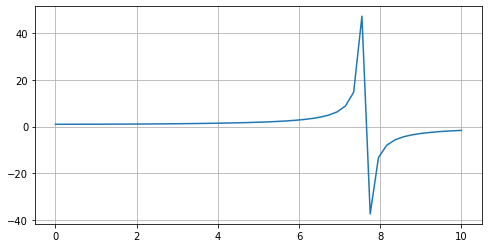

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
vals = m(alpha_grid)
ax.grid()
#ax.set_ylim((0, 2))
#ax.set_yticks((1,))
ax.plot(alpha_grid, vals)
plt.show()